# Author: Kumar R.

# Random_Forest

In this assignment we will build the random forest model after normalizing the variable to house pricing from boston data set.

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [2]:
#data set library
from sklearn import datasets

In [3]:
#load the dataset
boston = datasets.load_boston()

In [4]:
#Description of the dataset 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Create a dataframe
features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
targets = boston.target

In [8]:
#Concatination the target column into the dataset
features['PRICE'] = targets

In [9]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#Information
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


There are no missing values and all the data types are of float type

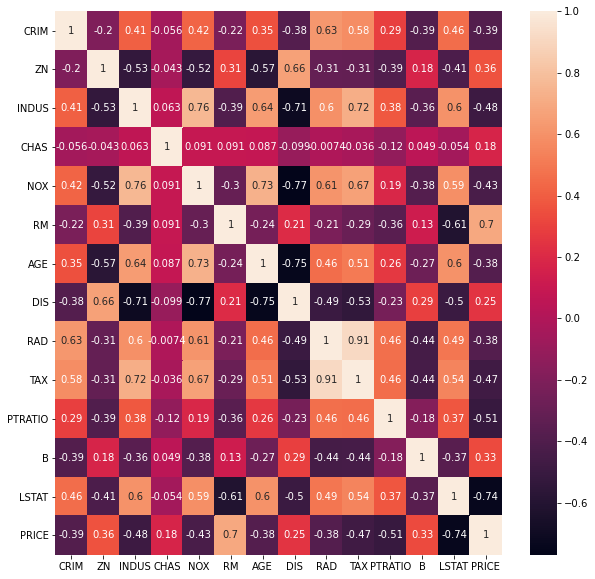

In [11]:
#check the correlation
cor = features.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)

In [12]:
#drop out the column CHAS
features = features.drop('CHAS', axis=1)

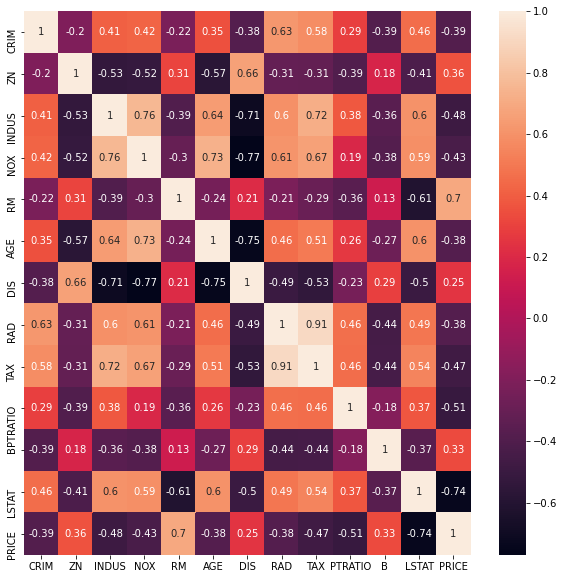

In [13]:
cor1 = features.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor1, annot=True)

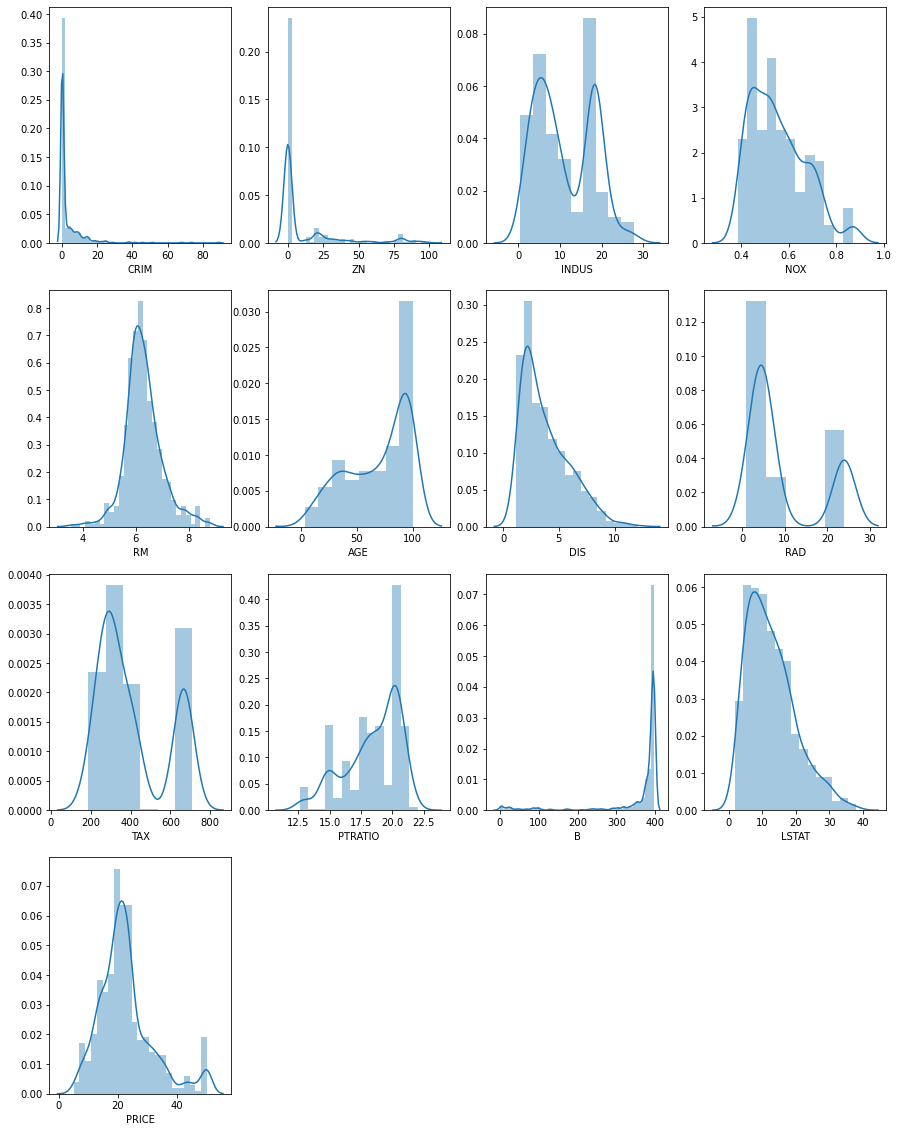

In [14]:
#Plot the distribution of the data
plt.figure(figsize=(15,20), facecolor='white')
plotnumber =1
for column in features:
    if plotnumber<=14:
        
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(features[column], label=[column])
        plotnumber+=1
        

In [15]:
#creating the function to remove the outliers
def outlier(column):
    sorted(column)
    Q1, Q3 = np.percentile(column, [25,75])
    
    IQR = Q3-Q1
    
    LR = Q1-(IQR*1.5)
    
    UR = Q3+(IQR*1.5)
    
    return LR, UR

In [16]:
#remove the outliers
for col in features.columns:
    lr, ur = outlier(features[col])
    features.drop(features[(features[col]>ur) | (features[col]<lr)].index, inplace=True)

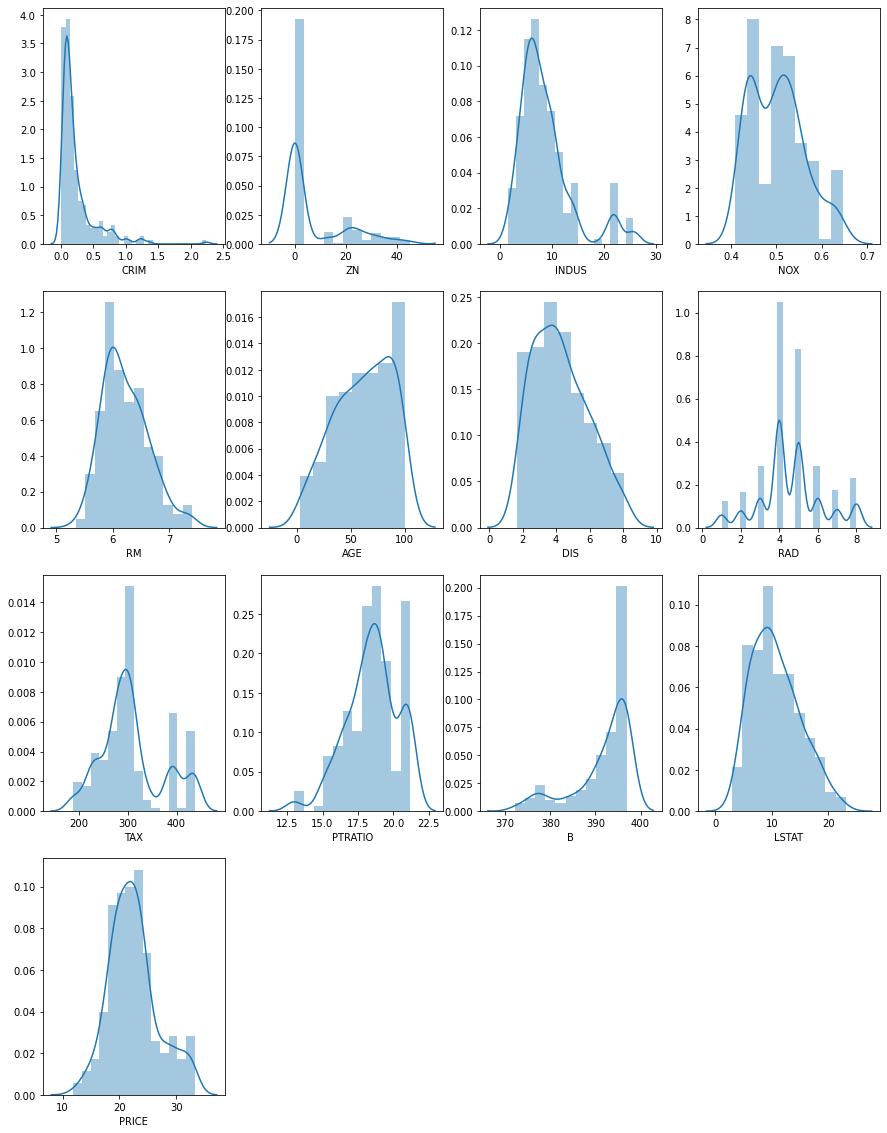

In [17]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1

for column in features:
    if plotnumber<15:
        
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(features[column], label=[column])
        plotnumber+=1
plt.show()

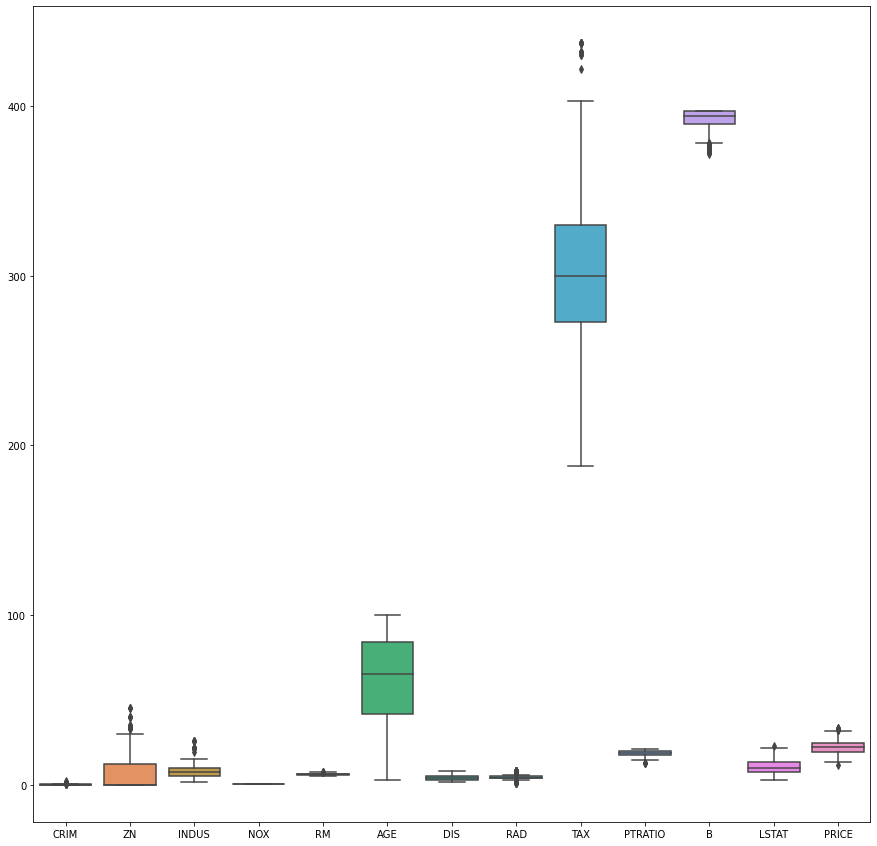

In [18]:
ax = plt.figure(figsize=(15,15))
sns.boxplot(data=features)

In [19]:
#Seperate the data into features and label
feature = features.iloc[:,:-1].values
label = features.iloc[:,-1].values

In [20]:
#Normaize the data
from sklearn.preprocessing import normalize
feature = normalize(feature)

In [21]:
#Training the model
from sklearn.model_selection import train_test_split
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2,random_state=i)
    
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(x_train,y_train)
    
    train_score = model.score(x_train,y_train)
    test_score  = model.score(x_test,y_test)
    
    if test_score>0.8:
        print(f"test score {test_score}, train score {train_score}, RS: {i}")
    

test score 0.8352760656089093, train score 0.9517604871840404, RS: 27
test score 0.8777620917187724, train score 0.9514808087065432, RS: 31
test score 0.8173249529142285, train score 0.9551710992342536, RS: 64
test score 0.8142807740436736, train score 0.9515438415731808, RS: 65
test score 0.8151373018178455, train score 0.9527926888584584, RS: 66
test score 0.8473071636467349, train score 0.951316972292368, RS: 87


In [23]:
#Training the model
x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2,random_state=31)
    
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
    
train_score = model.score(x_train,y_train)
test_score  = model.score(x_test,y_test)
    
print(f"test score {test_score}, train score {train_score}")
    

test score 0.8739757942947817, train score 0.9552907796826963


## Deployment

In [25]:
import pickle
pickle.dump(model, open("Random_Forest.model", 'wb'))

# Done!